### Summary of the Code:

- **Data Initialization:**
  - Loads LiDAR data points with x and y coordinates from a dataset.
  - Generates corresponding angles based on a specified range and step size.

- **Flat Surface Detection:**
  - The function `detect_flat_surface` identifies potential flat regions by scanning through the data points.
  - It calculates the variance of y-coordinates within a moving window of points.
  - If the variance is below a specified threshold, it considers those points as part of a flat surface.
  - The function attempts to extend the flat region by adding more points while maintaining a low variance.

- **Widest Flat Region Identification:**
  - Among all detected flat surfaces, the code calculates the width (difference in x-coordinates between the start and end of the region).
  - The widest flat region is identified by comparing these widths.

- **Plotting:**
  - All data points are plotted using Plotly.
  - If a widest flat region is detected, it is highlighted on the plot in red.
  - Hover text displays the angle, x, and y coordinates of each point.

- **Output:**
  - The plot is displayed and also saved as an interactive HTML file named "WIDEST_FLAT.html."

This code is designed to identify and visualize the widest flat surface in a set of LiDAR data, which can be useful for detecting stable, flat regions in the scanned environment.


Window start index: 0, Angle: 205.50°, Variance: 178.64
Window start index: 1, Angle: 206.00°, Variance: 286.64
Window start index: 2, Angle: 206.50°, Variance: 359.6
Window start index: 3, Angle: 207.00°, Variance: 343.75999999999993
Window start index: 4, Angle: 207.50°, Variance: 284.23999999999995
Window start index: 5, Angle: 208.00°, Variance: 234.95999999999995
Window start index: 6, Angle: 208.50°, Variance: 193.35999999999999
Window start index: 7, Angle: 209.00°, Variance: 154.95999999999998
Window start index: 8, Angle: 209.50°, Variance: 82.0
Window start index: 9, Angle: 210.00°, Variance: 62.0
Window start index: 10, Angle: 210.50°, Variance: 58.639999999999986
Window start index: 11, Angle: 211.00°, Variance: 54.160000000000004
Window start index: 12, Angle: 211.50°, Variance: 19.6
Window start index: 13, Angle: 212.00°, Variance: 25.839999999999996
Window start index: 14, Angle: 212.50°, Variance: 11.76
Extending region. Start: 14, Angle: 212.50°, End: 19, Angle: 215.00

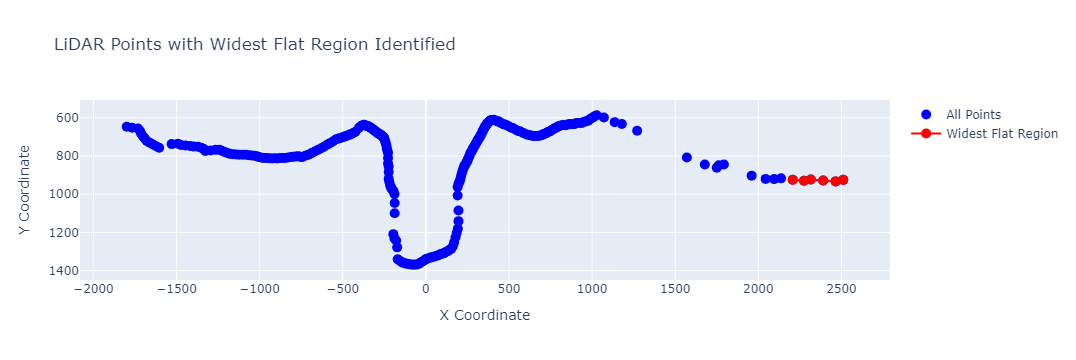

In [4]:
"""
### Summary of the Code:

- **Data Initialization:**
  - Loads LiDAR data points with x and y coordinates from a dataset.
  - Generates corresponding angles based on a specified range and step size.

- **Flat Surface Detection:**
  - The function `detect_flat_surface` identifies potential flat regions by scanning through the data points.
  - It calculates the variance of y-coordinates within a moving window of points.
  - If the variance is below a specified threshold, it considers those points as part of a flat surface.
  - The function attempts to extend the flat region by adding more points while maintaining a low variance.

- **Widest Flat Region Identification:**
  - Among all detected flat surfaces, the code calculates the width (difference in x-coordinates between the start and end of the region).
  - The widest flat region is identified by comparing these widths.

- **Plotting:**
  - All data points are plotted using Plotly.
  - If a widest flat region is detected, it is highlighted on the plot in red.
  - Hover text displays the angle, x, and y coordinates of each point.

- **Output:**
  - The plot is displayed and also saved as an interactive HTML file named "WIDEST_FLAT.html."

This code is designed to identify and visualize the widest flat surface in a set of LiDAR data, which can be useful for detecting stable, flat regions in the scanned environment.

"""



import numpy as np
import plotly.graph_objects as go

# Example data (replace with your full dataset)
data = {
    "angles": [
            [-1800,647],[-1767,652],[-1732,656],[-1720,669],[-1713,684],[-1703,697],[-1691,709],[-1680,722],[-1661,731],[-1642,740],[-1623,749],[-1605,757],[-1530,738],[-1492,736],[-1474,743],[-1447,745],[-1420,748],[-1397,751],[-1371,752],[-1352,757],[-1336,764],[-1327,774],[-1295,771],[-1265,768],[-1241,768],[-1226,774],[-1211,779],[-1196,784],[-1180,789],[-1161,791],[-1141,792],[-1123,794],[-1101,793],[-1082,794],[-1065,796],[-1048,797],[-1031,799],[-1017,802],[-1004,806],[-989,809],[-974,810],[-958,811],[-942,812],[-926,813],[-910,812],[-895,813],[-877,811],[-860,810],[-847,811],[-829,808],[-811,805],[-797,804],[-782,803],[-768,802],[-756,804],[-745,806],[-726,799],[-707,793],[-688,785],[-669,777],[-651,769],[-633,761],[-615,753],[-595,741],[-578,733],[-560,724],[-543,714],[-530,710],[-518,707],[-506,703],[-495,701],[-482,696],[-471,693],[-459,688],[-450,686],[-437,680],[-424,673],[-403,653],[-389,642],[-380,639],[-371,637],[-365,640],[-359,642],[-352,643],[-346,645],[-341,648],[-335,651],[-329,654],[-324,657],[-318,661],[-313,665],[-307,668],[-302,672],[-297,676],[-291,679],[-286,682],[-280,686],[-274,688],[-268,692],[-263,696],[-258,701],[-252,704],[-249,713],[-245,723],[-241,734],[-238,744],[-235,760],[-232,772],[-228,783],[-228,811],[-228,839],[-224,855],[-224,884],[-224,920],[-220,936],[-215,955],[-209,967],[-202,977],[-195,984],[-189,999],[-188,1046],[-188,1100],[-196,1209],[-189,1231],[-179,1242],[-173,1278],[-170,1340],[-159,1347],[-147,1354],[-136,1359],[-124,1362],[-113,1364],[-101,1366],[-89,1368],[-77,1369],[-65,1368],[-53,1368],[-41,1363],[-29,1356],[-17,1351],[-5,1342],[6,1338],[17,1335],[29,1331],[40,1328],[52,1326],[63,1323],[75,1319],[86,1314],[97,1312],[109,1308],[120,1302],[131,1298],[141,1292],[152,1286],[162,1272],[170,1251],[178,1225],[185,1203],[192,1181],[196,1141],[196,1085],[191,1007],[191,962],[196,945],[203,933],[208,919],[212,902],[217,888],[222,874],[227,862],[232,852],[238,845],[243,835],[249,827],[253,816],[258,807],[263,798],[267,786],[272,780],[277,772],[282,763],[287,757],[291,749],[296,743],[301,735],[305,728],[310,721],[314,714],[319,708],[323,702],[328,695],[332,688],[336,681],[340,674],[344,667],[347,660],[352,654],[355,647],[360,642],[364,637],[368,632],[373,627],[377,622],[383,618],[388,614],[394,612],[401,612],[408,611],[418,614],[431,620],[439,620],[451,627],[465,634],[475,635],[486,639],[500,646],[515,652],[526,655],[543,664],[557,670],[569,672],[586,680],[602,686],[616,690],[629,692],[643,695],[655,696],[666,696],[677,695],[687,693],[697,691],[705,687],[715,684],[724,681],[731,676],[741,673],[750,669],[757,664],[766,660],[774,655],[784,652],[792,647],[802,643],[813,640],[824,638],[840,639],[852,636],[865,633],[881,634],[897,633],[905,627],[922,627],[939,627],[949,622],[963,619],[976,615],[985,609],[995,603],[1007,598],[1015,592],[1028,587],[1071,599],[1136,623],[1179,633],[1271,668],[1570,808],[1678,845],[1750,862],[1762,849],[1793,845],[1960,903],[2044,920],[2095,921],[2137,917],[2207,924],[2275,930],[2316,923],[2390,928],[2465,933],[2511,925]  
    ]
}

# Parameters for angle calculation
angle_step = 0.5  # Step size between angles
range_start = 205.50  # Starting angle
range_end = 345.50  # Ending angle

# Extract x and y coordinates
x_coords = [point[0] for point in data["angles"]]
y_coords = [point[1] for point in data["angles"]]

# Generate angles corresponding to the points
angles = np.arange(range_start, range_start + len(x_coords) * angle_step, angle_step)

# Define thresholds and minimum points for flat surface detection
y_variance_threshold = 15  # Example threshold for y-variance
min_consecutive_points = 5    # Minimum number of consecutive points to consider a flat region

def detect_flat_surface(x_coords, y_coords, angles, y_variance_threshold, min_consecutive_points):
    flat_regions = []
    i = 0
    while i < len(x_coords) - min_consecutive_points:
        # Calculate the variance of y-coordinates in the current window
        y_variance = np.var(y_coords[i:i + min_consecutive_points])
        
        # Debugging: Print the variance value and corresponding angle
        print(f"Window start index: {i}, Angle: {angles[i]:.2f}°, Variance: {y_variance}")

        # If the variance is below the threshold, it's a potential flat region
        if y_variance < y_variance_threshold:
            start = i
            end = i + min_consecutive_points - 1

            # Try to extend the flat region by adding more points while variance is low
            while end < len(x_coords) - 1:
                extended_variance = np.var(y_coords[start:end + 2])
                print(f"Extending region. Start: {start}, Angle: {angles[start]:.2f}°, End: {end+1}, Angle: {angles[end+1]:.2f}°, Extended Variance: {extended_variance}")
                
                if extended_variance < y_variance_threshold:
                    end += 1
                else:
                    break

            # If a sufficiently large flat region is found, store it
            if end - start + 1 >= min_consecutive_points:
                flat_regions.append((start, end))
            i = end
        else:
            i += 1

    return flat_regions

# Detect flat surfaces in the dataset
flat_regions = detect_flat_surface(x_coords, y_coords, angles, y_variance_threshold, min_consecutive_points)

# Calculate widths of detected flat surfaces and select the one with the largest width
max_width = 0
widest_flat_region = None

for start, end in flat_regions:
    # Calculate the width as the absolute difference between the starting and ending x-coordinates
    width = abs(x_coords[end] - x_coords[start])
    
    # Check if this width is the largest we've found so far
    if width > max_width:
        max_width = width
        widest_flat_region = (start, end)

# Now `widest_flat_region` contains the start and end indices of the widest flat surface
if widest_flat_region is not None:
    start, end = widest_flat_region
    print(f"Widest flat region found from index {start} to {end} with width {max_width:.2f} units.")
else:
    print("No flat regions detected.")

# Plotting the points and the identified flat regions
fig = go.Figure()

# Plot all points
fig.add_trace(go.Scatter(
    x=x_coords,
    y=y_coords,
    mode='markers',
    marker=dict(size=10, color='blue'),
    text=[f"Angle: {angle:.2f}°, X: {x}, Y: {y}" for angle, x, y in zip(angles, x_coords, y_coords)],  # Display coordinates and angles on hover
    hoverinfo='text',
    name='All Points'
))

# Highlight the widest flat region if detected
if widest_flat_region is not None:
    start, end = widest_flat_region
    fig.add_trace(go.Scatter(
        x=x_coords[start:end+1],
        y=y_coords[start:end+1],
        mode='markers+lines',
        marker=dict(size=10, color='red'),
        line=dict(color='red', width=2),
        text=[f"Widest Flat Region: Angle: {angle:.2f}°, X: {x}, Y: {y}" for angle, x, y in zip(angles[start:end+1], x_coords[start:end+1], y_coords[start:end+1])],
        hoverinfo='text',
        name='Widest Flat Region'
    ))

# Invert the y-axis and set the title and labels
fig.update_layout(
    title='LiDAR Points with Widest Flat Region Identified',
    xaxis_title='X Coordinate',
    yaxis_title='Y Coordinate',
    yaxis=dict(autorange='reversed'),  # This inverts the y-axis
    showlegend=True
)

# Show the plot
fig.show()
# Save plot as an interactive HTML file
fig.write_html("WIDEST_FLAT.html")


###
###
###
###
###
###
###
###
###
###
###
###


### Summary of the Code:

- **Data Loading and Initialization:**
  - Loads LiDAR data from a JSON file, which contains angles and distances.
  - Converts angles from degrees to radians.
  - Converts polar coordinates (angle, distance) to Cartesian coordinates (x, y).

- **Coordinate Rotation:**
  - Rotates the Cartesian coordinates based on a specified tilt angle.
  - Defines specific angle ranges to identify different regions (e.g., the earth's surface, max y-coordinate range).

- **Ground Level Detection:**
  - Identifies the highest y-coordinate within a defined angle range to determine the ground level (`y_surface_level_rotated`).

- **Depth Calculation:**
  - Calculates the depth of each point relative to the identified ground level.

- **Flat Surface Detection:**
  - **Variance Calculation:**
    - Scans through the data to identify flat surfaces by calculating the variance of y-coordinates over a moving window of points.
    - Points with low variance in y-coordinates are considered part of a flat surface.
  - **Flat Surface Detection Logic:**
    - The function `detect_flat_surface` identifies potential flat regions on both sides of the trench by checking if the variance within a window is below a certain threshold.
    - It stores the indices of the start and end of each detected flat region.

- **Widest Flat Surface Identification:**
  - **Determine the Widest Flat Region:**
    - The function `get_widest_flat_region` calculates the width (in x-coordinates) of each detected flat region.
    - The widest flat region on each side (left and right) is identified by calculating the width in x-coordinates.

- **Final Depth Calculation Based on Widest Flat Surface:**
  - **Comparison of Widths:**
    - If both sides have detected flat regions, the code compares the widths of these regions.
    - The side with the widest flat region is selected.
  - **Average Y-Value Calculation:**
    - The average y-value of the selected widest flat region is calculated.
  - **Final Depth Calculation:**
    - The final depth is determined by subtracting this average y-value from the ground level (`y_surface_level_rotated`).

- **Fallback Depth Calculation (if no flat surfaces are detected):**
  - **Depth Sorting Method:**
    - If no flat regions are detected, the code sorts the depths within specified angle ranges and selects the top 30 highest values.
    - The lowest value among these top 30 depths is used to calculate the final depth.

- **Threshold and Bump Point Detection:**
  - Calculates a threshold as 5% of the final depth and identifies points above this threshold.
  - Attempts to identify and fit a circle to the lowest points around the trench bottom, which could represent a pipe.

- **Plotting:**
  - Generates a plot visualizing the LiDAR points, highlighting the detected flat surfaces, and the trench-bottom.
  - Annotates the plot with key information, such as the final depth, the detected trench-bottom, and whether a pipe was detected.

- **Output:**
  - The final plot is saved as an interactive HTML file.

### Key Logical Parts:

1. **Detection of the Widest Flat Surface:**
   - Both sides of the trench are scanned for flat surfaces based on the variance in y-coordinates.
   - The widest flat region on each side is identified by calculating the width in x-coordinates.

2. **Final Depth Calculation:**
   - The side with the widest flat surface is selected.
   - The final depth is calculated by subtracting the average y-value of this selected widest flat surface from the ground level (`y_surface_level_rotated`).

This approach ensures that the final depth is based on the widest flat surface, which is likely to provide a stable reference point for the trench's depth relative to the ground level.


Window start index: 0, Angle: 290.00°, Variance: 5441.546046651997
Window start index: 1, Angle: 291.00°, Variance: 3106.840634831389
Window start index: 2, Angle: 292.00°, Variance: 12.837979541555944
Window start index: 3, Angle: 293.00°, Variance: 7.552709338720189
Window start index: 4, Angle: 294.00°, Variance: 3.8779907185451608
Window start index: 5, Angle: 295.00°, Variance: 1.8570102231717684
Extending region. Start: 5, Angle: 295.00°, End: 20, Angle: 310.00°, Extended Variance: 1.8098287956956374
Extending region. Start: 5, Angle: 295.00°, End: 21, Angle: 311.00°, Extended Variance: 1.8138449230379114
Extending region. Start: 5, Angle: 295.00°, End: 22, Angle: 312.00°, Extended Variance: 1.8586476745539007
Extending region. Start: 5, Angle: 295.00°, End: 23, Angle: 313.00°, Extended Variance: 1.8743283935199966
Extending region. Start: 5, Angle: 295.00°, End: 24, Angle: 314.00°, Extended Variance: 1.908479541298022
Extending region. Start: 5, Angle: 295.00°, End: 25, Angle: 3

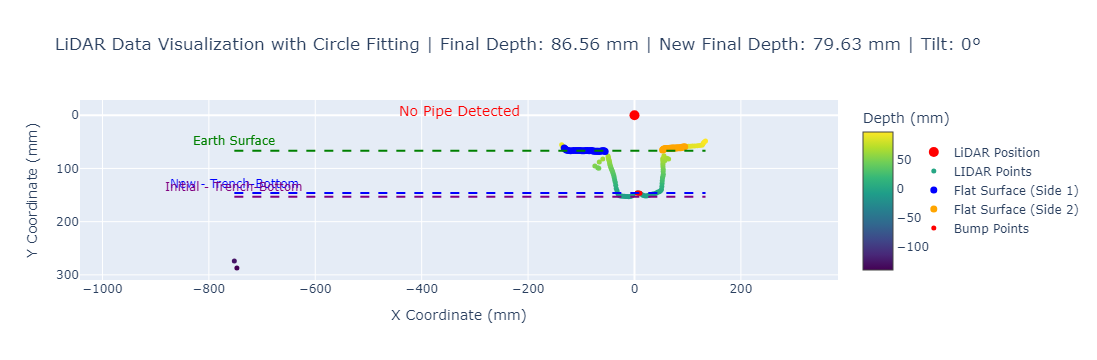

In [2]:
"""
### Summary of the Code:

- **Data Loading and Initialization:**
  - Loads LiDAR data from a JSON file, which contains angles and distances.
  - Converts angles from degrees to radians.
  - Converts polar coordinates (angle, distance) to Cartesian coordinates (x, y).

- **Coordinate Rotation:**
  - Rotates the Cartesian coordinates based on a specified tilt angle.
  - Defines specific angle ranges to identify different regions (e.g., the earth's surface, max y-coordinate range).

- **Ground Level Detection:**
  - Identifies the highest y-coordinate within a defined angle range to determine the ground level (`y_surface_level_rotated`).

- **Depth Calculation:**
  - Calculates the depth of each point relative to the identified ground level.

- **Flat Surface Detection:**
  - **Variance Calculation:**
    - Scans through the data to identify flat surfaces by calculating the variance of y-coordinates over a moving window of points.
    - Points with low variance in y-coordinates are considered part of a flat surface.
  - **Flat Surface Detection Logic:**
    - The function `detect_flat_surface` identifies potential flat regions on both sides of the trench by checking if the variance within a window is below a certain threshold.
    - It stores the indices of the start and end of each detected flat region.

- **Widest Flat Surface Identification:**
  - **Determine the Widest Flat Region:**
    - The function `get_widest_flat_region` calculates the width (in x-coordinates) of each detected flat region.
    - The widest flat region on each side (left and right) is identified by calculating the width in x-coordinates.

- **Final Depth Calculation Based on Widest Flat Surface:**
  - **Comparison of Widths:**
    - If both sides have detected flat regions, the code compares the widths of these regions.
    - The side with the widest flat region is selected.
  - **Average Y-Value Calculation:**
    - The average y-value of the selected widest flat region is calculated.
  - **Final Depth Calculation:**
    - The final depth is determined by subtracting this average y-value from the ground level (`y_surface_level_rotated`).

- **Fallback Depth Calculation (if no flat surfaces are detected):**
  - **Depth Sorting Method:**
    - If no flat regions are detected, the code sorts the depths within specified angle ranges and selects the top 30 highest values.
    - The lowest value among these top 30 depths is used to calculate the final depth.

- **Threshold and Bump Point Detection:**
  - Calculates a threshold as 5% of the final depth and identifies points above this threshold.
  - Attempts to identify and fit a circle to the lowest points around the trench bottom, which could represent a pipe.

- **Plotting:**
  - Generates a plot visualizing the LiDAR points, highlighting the detected flat surfaces, and the trench-bottom.
  - Annotates the plot with key information, such as the final depth, the detected trench-bottom, and whether a pipe was detected.

- **Output:**
  - The final plot is saved as an interactive HTML file.

### Key Logical Parts:

1. **Detection of the Widest Flat Surface:**
   - Both sides of the trench are scanned for flat surfaces based on the variance in y-coordinates.
   - The widest flat region on each side is identified by calculating the width in x-coordinates.

2. **Final Depth Calculation:**
   - The side with the widest flat surface is selected.
   - The final depth is calculated by subtracting the average y-value of this selected widest flat surface from the ground level (`y_surface_level_rotated`).

This approach ensures that the final depth is based on the widest flat surface, which is likely to provide a stable reference point for the trench's depth relative to the ground level.
"""





import json
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import least_squares

# Function to fit a circle to given points
def fit_circle(x, y):
    def calc_R(xc, yc):
        return np.sqrt((x - xc) ** 2 + (y - yc) ** 2)

    def f_2(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()

    center_estimate = x.mean(), y.mean()
    result = least_squares(f_2, center_estimate)
    xc, yc = result.x
    Ri = calc_R(xc, yc)
    R = Ri.mean()
    return xc, yc, R, Ri

# Given JSON data (shortened for brevity)
json_data = """
{
    "angles": [
                       {"angle": 2, "distance": 146.333328},
        {"angle": 3, "distance": 146.333328},
        {"angle": 4, "distance": 147.000000},
        {"angle": 5, "distance": 149.125000},
        {"angle": 6, "distance": 151.157898},
        {"angle": 7, "distance": 152.333328},
        {"angle": 8, "distance": 153.437500},
        {"angle": 9, "distance": 153.071426},
        {"angle": 10, "distance": 152.899994},
        {"angle": 11, "distance": 152.399994},
        {"angle": 12, "distance": 152.111115},
        {"angle": 13, "distance": 152.142853},
        {"angle": 14, "distance": 152.615387},
        {"angle": 15, "distance": 152.428574},
        {"angle": 16, "distance": 151.545456},
        {"angle": 17, "distance": 151.000000},
        {"angle": 18, "distance": 151.000000},
        {"angle": 19, "distance": 150.300003},
        {"angle": 20, "distance": 148.333328},
        {"angle": 21, "distance": 143.500000},
        {"angle": 22, "distance": 138.333328},
        {"angle": 23, "distance": 133.555557},
        {"angle": 24, "distance": 129.307693},
        {"angle": 25, "distance": 126.375000},
        {"angle": 26, "distance": 123.545456},
        {"angle": 27, "distance": 118.769234},
        {"angle": 28, "distance": 115.000000},
        {"angle": 29, "distance": 110.437500},
        {"angle": 30, "distance": 106.875000},
        {"angle": 31, "distance": 104.199997},
        {"angle": 32, "distance": 100.599998},
        {"angle": 33, "distance": 97.333336},
        {"angle": 34, "distance": 102.500000},
        {"angle": 35, "distance": 96.555557},
        {"angle": 36, "distance": 94.222221},
        {"angle": 37, "distance": 101.125000},
        {"angle": 38, "distance": 104.199997},
        {"angle": 39, "distance": 84.000000},
        {"angle": 40, "distance": 84.166664},
        {"angle": 41, "distance": 84.142860},
        {"angle": 42, "distance": 85.000000},
        {"angle": 43, "distance": 85.666664},
        {"angle": 44, "distance": 87.199997},
        {"angle": 45, "distance": 88.428574},
        {"angle": 46, "distance": 90.000000},
        {"angle": 47, "distance": 91.166664},
        {"angle": 48, "distance": 92.714287},
        {"angle": 49, "distance": 94.111115},
        {"angle": 50, "distance": 95.599998},
        {"angle": 51, "distance": 98.099998},
        {"angle": 52, "distance": 99.833336},
        {"angle": 53, "distance": 101.818184},
        {"angle": 54, "distance": 104.300003},
        {"angle": 55, "distance": 106.250000},
        {"angle": 56, "distance": 107.833336},
        {"angle": 57, "distance": 109.583336},
        {"angle": 58, "distance": 111.285713},
        {"angle": 59, "distance": 114.000000},
        {"angle": 60, "distance": 117.000000},
        {"angle": 61, "distance": 119.833336},
        {"angle": 62, "distance": 123.272728},
        {"angle": 63, "distance": 126.916664},
        {"angle": 64, "distance": 131.272720},
        {"angle": 65, "distance": 134.777771},
        {"angle": 66, "distance": 138.692307},
        {"angle": 67, "distance": 139.375000},
        {"angle": 68, "distance": 139.571426},
        {"angle": 69, "distance": 140.399994},
        {"angle": 70, "distance": 142.111115},
        {"angle": 290, "distance": 800.399994},
        {"angle": 291, "distance": 800.500000},
        {"angle": 292, "distance": 147.666672},
        {"angle": 293, "distance": 147.166672},
        {"angle": 294, "distance": 147.600006},
        {"angle": 295, "distance": 145.666672},
        {"angle": 296, "distance": 144.800003},
        {"angle": 297, "distance": 143.500000},
        {"angle": 298, "distance": 141.333328},
        {"angle": 299, "distance": 137.399994},
        {"angle": 300, "distance": 132.500000},
        {"angle": 301, "distance": 128.399994},
        {"angle": 302, "distance": 125.000000},
        {"angle": 303, "distance": 122.000000},
        {"angle": 304, "distance": 119.000000},
        {"angle": 305, "distance": 116.000000},
        {"angle": 306, "distance": 113.000000},
        {"angle": 307, "distance": 110.000000},
        {"angle": 308, "distance": 108.000000},
        {"angle": 309, "distance": 105.000000},
        {"angle": 310, "distance": 104.000000},
        {"angle": 311, "distance": 102.500000},
        {"angle": 312, "distance": 101.000000},
        {"angle": 313, "distance": 99.000000},
        {"angle": 314, "distance": 97.500000},
        {"angle": 315, "distance": 96.000000},
        {"angle": 316, "distance": 94.500000},
        {"angle": 317, "distance": 92.000000},
        {"angle": 318, "distance": 90.000000},
        {"angle": 319, "distance": 88.500000},
        {"angle": 320, "distance": 87.666664},
        {"angle": 321, "distance": 87.599998},
        {"angle": 322, "distance": 121.000000},
        {"angle": 323, "distance": 110.000000},
        {"angle": 324, "distance": 101.400002},
        {"angle": 325, "distance": 120.250000},
        {"angle": 326, "distance": 120.000000},
        {"angle": 327, "distance": 91.199997},
        {"angle": 328, "distance": 93.000000},
        {"angle": 329, "distance": 94.599998},
        {"angle": 330, "distance": 96.666664},
        {"angle": 331, "distance": 97.800003},
        {"angle": 332, "distance": 100.000000},
        {"angle": 333, "distance": 102.250000},
        {"angle": 334, "distance": 104.428574},
        {"angle": 335, "distance": 106.400002},
        {"angle": 336, "distance": 108.400002},
        {"angle": 337, "distance": 110.285713},
        {"angle": 338, "distance": 112.250000},
        {"angle": 339, "distance": 114.400002},
        {"angle": 340, "distance": 116.875000},
        {"angle": 341, "distance": 119.599998},
        {"angle": 342, "distance": 123.199997},
        {"angle": 343, "distance": 127.400002},
        {"angle": 344, "distance": 131.000000},
        {"angle": 345, "distance": 136.181824},
        {"angle": 346, "distance": 141.857147},
        {"angle": 347, "distance": 145.777771},
        {"angle": 348, "distance": 150.285721},
        {"angle": 349, "distance": 153.000000},
        {"angle": 350, "distance": 154.222229},
        {"angle": 351, "distance": 153.666672},
        {"angle": 352, "distance": 153.857147},
        {"angle": 353, "distance": 153.250000},
        {"angle": 354, "distance": 153.500000},
        {"angle": 355, "distance": 153.199997},
        {"angle": 356, "distance": 153.428574},
        {"angle": 357, "distance": 153.000000},
        {"angle": 358, "distance": 152.000000},
        {"angle": 359, "distance": 150.000000}
    ],
    "tiltAngle": 0.000000,
    "finalDepth": 86.923981,
    "newFinalDepth": 80.001923,
    "detectionStatus": "Pipe Detected",
    "xc": 7.673218,
    "yc": 146.339615,
    "R": 1.791339,
    "max_residual": 1.583982,
    "mean_residual": 1.055988,
    "radius_limit": 3.478334,
    "is_good_fit": 1,
    "diameter_limit": 6.956668,
    "pipeDiameter": 3.582677
}
"""

# Load JSON data
data = json.loads(json_data)

# Extract angles and distances
angles_degrees = [point["angle"] for point in data["angles"]]
distances_mm = [point["distance"] for point in data["angles"]]

# Convert angles from degrees to radians
angles_radians = np.radians(angles_degrees)

# Convert to Cartesian coordinates
x_coords = [distance_mm * np.sin(angle) for angle, distance_mm in zip(angles_radians, distances_mm)]
y_coords = [distance_mm * np.cos(angle) for angle, distance_mm in zip(angles_radians, distances_mm)]

# Assuming the LIDAR is at the origin for simplicity
lidar_pos = (0, 0)

# Define tilt value
tilt = 0  # This can be adjusted as needed

# Rotate the coordinates by tilt angle degrees counterclockwise
rotation_angle = np.radians(tilt)
cos_angle = np.cos(rotation_angle)
sin_angle = np.sin(rotation_angle)
x_coords_rotated = [x * cos_angle - y * sin_angle for x, y in zip(x_coords, y_coords)]
y_coords_rotated = [x * sin_angle + y * cos_angle for x, y in zip(x_coords, y_coords)]

# Define angle ranges with tilt angle adjustment and wrapping logic
startAngleRange1 = (290 + tilt) % 360
endAngleRange1 = (359 + tilt) % 360
startAngleRange2 = (0 + tilt) % 360
endAngleRange2 = (70 + tilt) % 360

if startAngleRange1 < 0: startAngleRange1 += 360
if endAngleRange1 < 0: endAngleRange1 += 360
if startAngleRange2 < 0: startAngleRange2 += 360
if endAngleRange2 < 0: endAngleRange2 += 360

# Define the angle range for selecting the maximum Y-coordinate
max_Y_startAngleRange = (348 + tilt) % 360
max_Y_endAngleRange = (12 + tilt) % 360

if max_Y_startAngleRange < 0: startAngleRange1 += 360
if max_Y_endAngleRange < 0: endAngleRange2 += 360

# Define the angle range for selecting the earth surface
earth_Surface_startAngleRange1  = (290 + tilt) % 360
earth_Surface_endAngleRange1    = (348 + tilt) % 360
earth_Surface_startAngleRange2  = (12 + tilt) % 360
earth_Surface_endAngleRange2    = (70 + tilt) % 360

# Adjust for negative angles, ensuring all angles are positive
if earth_Surface_startAngleRange1  < 0: earth_Surface_startAngleRange1 += 360
if earth_Surface_endAngleRange1    < 0: earth_Surface_endAngleRange1 += 360
if earth_Surface_startAngleRange2  < 0: earth_Surface_startAngleRange2 += 360
if earth_Surface_endAngleRange2    < 0: earth_Surface_endAngleRange2 += 360

# Filter the Y-coordinates within the specified angle range
y_coords_in_range = [
    y for angle, y in zip(angles_degrees, y_coords_rotated) 
    if (max_Y_startAngleRange <= angle <= max_Y_endAngleRange) or 
       (max_Y_startAngleRange > max_Y_endAngleRange and (angle >= max_Y_startAngleRange or angle <= max_Y_endAngleRange))
]

# Ensure there are points within the specified angle range
if not y_coords_in_range:
    raise ValueError("No points found within the specified angle range.")

# Identify the highest Y-coordinate value as the ground level reference after rotation within the angle range
y_surface_level_rotated = max(y_coords_in_range)

# Calculate the depth of each point relative to the highest point (ground level) after rotation
depths_rotated = [y_surface_level_rotated - y for y in y_coords_rotated]

# Define thresholds and minimum points for flat surface detection
y_variance_threshold = 2.5  # Example threshold for y-variance
min_consecutive_points = 15  # Minimum number of consecutive points to consider a flat region


def detect_flat_surface(filtered_x_coords, filtered_y_coords, filtered_angles, y_variance_threshold, min_points):
    flat_regions = []
    i = 0
    while i < len(filtered_x_coords) - min_points:
        # Calculate the variance of y-coordinates in the current window
        y_variance = np.var(filtered_y_coords[i:i + min_points])
        
        # Debugging: Print the variance and associated angle for the window
        print(f"Window start index: {i}, Angle: {filtered_angles[i]:.2f}°, Variance: {y_variance}")

        # If the variance is below the threshold, it's a potential flat region
        if y_variance < y_variance_threshold:
            start = i
            end = i + min_points - 1

            # Try to extend the flat region by adding more points while variance is low
            while end < len(filtered_x_coords) - 1:
                extended_variance = np.var(filtered_y_coords[start:end + 2])
                print(f"Extending region. Start: {start}, Angle: {filtered_angles[start]:.2f}°, End: {end+1}, Angle: {filtered_angles[end+1]:.2f}°, Extended Variance: {extended_variance}")
                
                if extended_variance < y_variance_threshold:
                    end += 1
                else:
                    break

            # If a sufficiently large flat region is found, store it
            if end - start + 1 >= min_points:
                flat_regions.append((start, end))
            i = end
        else:
            i += 1
    return flat_regions


# Function to determine the widest flat region
def get_widest_flat_region(flat_regions, x_coords):
    max_width = 0
    widest_flat_region = None
    for start, end in flat_regions:
        width = abs(x_coords[end] - x_coords[start])
        if width > max_width:
            max_width = width
            widest_flat_region = (start, end)
    return widest_flat_region, max_width

# Print the angles and corresponding indices being considered for Side 1
filtered_angles_side1 = []
filtered_x_coords_side1 = []
filtered_y_coords_side1 = []

for angle, x, y in zip(angles_degrees, x_coords_rotated, y_coords_rotated):
    if (earth_Surface_startAngleRange1 <= angle <= earth_Surface_endAngleRange1) or \
       (earth_Surface_startAngleRange1 > earth_Surface_endAngleRange1 and \
        (angle >= earth_Surface_startAngleRange1 or angle <= earth_Surface_endAngleRange1)):
        filtered_angles_side1.append(angle)
        filtered_x_coords_side1.append(x)
        filtered_y_coords_side1.append(y)

# Print the angles and corresponding indices being considered for Side 2
filtered_angles_side2 = []
filtered_x_coords_side2 = []
filtered_y_coords_side2 = []

for angle, x, y in zip(angles_degrees, x_coords_rotated, y_coords_rotated):
    if (earth_Surface_startAngleRange2 <= angle <= earth_Surface_endAngleRange2) or \
       (earth_Surface_startAngleRange2 > earth_Surface_endAngleRange2 and \
        (angle >= earth_Surface_startAngleRange2 or angle <= earth_Surface_endAngleRange2)):
        filtered_angles_side2.append(angle)
        filtered_x_coords_side2.append(x)
        filtered_y_coords_side2.append(y)

# Detect flat surfaces on both sides
flat_regions_side1 = detect_flat_surface(
    filtered_x_coords_side1,
    filtered_y_coords_side1,
    filtered_angles_side1,  # Add this line to pass the filtered angles
    y_variance_threshold=y_variance_threshold,
    min_points=min_consecutive_points
)

flat_regions_side2 = detect_flat_surface(
    filtered_x_coords_side2,
    filtered_y_coords_side2,
    filtered_angles_side2,  # Add this line to pass the filtered angles
    y_variance_threshold=y_variance_threshold,
    min_points=min_consecutive_points
)


# Determine the widest flat region on each side
widest_flat_region_side1, width_side1 = get_widest_flat_region(flat_regions_side1, filtered_x_coords_side1)
widest_flat_region_side2, width_side2 = get_widest_flat_region(flat_regions_side2, filtered_x_coords_side2)

# Determine the final depth based on the widest flat surface
if widest_flat_region_side1 is not None and widest_flat_region_side2 is not None:
    if width_side1 > width_side2:
        start, end = widest_flat_region_side1
        avg_flat_y = np.mean(filtered_y_coords_side1[start:end + 1])
    else:
        start, end = widest_flat_region_side2
        avg_flat_y = np.mean(filtered_y_coords_side2[start:end + 1])
    final_depth = y_surface_level_rotated - avg_flat_y
    print(f"Selected widest flat region for final depth calculation. Final Depth: {final_depth:.2f} mm")
elif widest_flat_region_side1 is not None:
    start, end = widest_flat_region_side1
    avg_flat_y = np.mean(filtered_y_coords_side1[start:end + 1])
    final_depth = y_surface_level_rotated - avg_flat_y
    print(f"Flat region detected on side 1. Final Depth using flat surface: {final_depth:.2f} mm")
elif widest_flat_region_side2 is not None:
    start, end = widest_flat_region_side2
    avg_flat_y = np.mean(filtered_y_coords_side2[start:end + 1])
    final_depth = y_surface_level_rotated - avg_flat_y
    print(f"Flat region detected on side 2. Final Depth using flat surface: {final_depth:.2f} mm")
else:
    print("No flat regions detected. Using depth sorting method.")

    # Collect depths for specified angle ranges
    depths_range1 = [depth for angle, depth in zip(angles_degrees, depths_rotated) 
                     if (earth_Surface_startAngleRange1 <= angle <= earth_Surface_endAngleRange1) or 
                        (earth_Surface_startAngleRange1 > earth_Surface_endAngleRange1 and 
                         (angle >= earth_Surface_startAngleRange1 or angle <= earth_Surface_endAngleRange1))]

    depths_range2 = [depth for angle, depth in zip(angles_degrees, depths_rotated) 
                     if (earth_Surface_startAngleRange2 <= angle <= earth_Surface_endAngleRange2) or 
                        (earth_Surface_startAngleRange2 > earth_Surface_endAngleRange2 and 
                         (angle >= earth_Surface_startAngleRange2 or angle <= earth_Surface_endAngleRange2))]

    # Sort the depths and take the top 30 highest values
    depths_range1.sort(reverse=True)
    depths_range2.sort(reverse=True)

    top_30_depths_range1 = depths_range1[:30]
    top_30_depths_range2 = depths_range2[:30]

    # Take the lowest value out of those 30 values on both sides
    min_top_30_depth_range1 = min(top_30_depths_range1) if top_30_depths_range1 else float('inf')
    min_top_30_depth_range2 = min(top_30_depths_range2) if top_30_depths_range2 else float('inf')

    # Determine the final depth value
    final_depth = min(min_top_30_depth_range1, min_top_30_depth_range2)

    # Print the final depth value
    print(f"Final Depth using depth sorting: {final_depth:.2f} mm")

# Calculate the threshold as 5% of the final depth value
threshold_value = 0.05 * final_depth

# Filter points above the threshold within the specified max Y-coordinate angle range
threshold_indices = [i for i, y in enumerate(y_coords_rotated) 
                     if y >= y_surface_level_rotated - threshold_value and 
                     ((max_Y_startAngleRange <= angles_degrees[i] <= max_Y_endAngleRange) or 
                      (max_Y_startAngleRange > max_Y_endAngleRange and 
                       (angles_degrees[i] >= max_Y_startAngleRange or angles_degrees[i] <= max_Y_endAngleRange)))]

threshold_angles = [angles_degrees[i] for i in threshold_indices]

if threshold_angles:
    # Determine the angle range for the points above the threshold
    threshold_angles.sort()
    if threshold_angles[-1] - threshold_angles[0] <= 180:
        angle_range_start = threshold_angles[0]
        angle_range_end = threshold_angles[-1]
    else:
        for i in range(1, len(threshold_angles)):
            if threshold_angles[i] - threshold_angles[i-1] > 180:
                angle_range_start = threshold_angles[i]
                angle_range_end = threshold_angles[i-1] + 360
                break

    if angle_range_end < angle_range_start:
        angle_range_end += 360

    # Collect all points within this new angle range
    filtered_points = [(x, y, d, a) for x, y, d, a in zip(x_coords_rotated, y_coords_rotated, depths_rotated, angles_degrees)
                       if angle_range_start <= a <= angle_range_end or (angle_range_start <= a + 360 <= angle_range_end) or (angle_range_start <= a - 360 <= angle_range_end)]

    # Ensure the wrap-around angle logic is correct
    adjusted_angles = [a if angle_range_start <= a <= angle_range_end else (a + 360 if a + 360 <= angle_range_end else a - 360) for _, _, _, a in filtered_points]

    # Collect points with adjusted angles
    filtered_points = [(x, y, d, a) for (x, y, d, a), adj_a in zip(filtered_points, adjusted_angles) if angle_range_start <= adj_a <= angle_range_end]

    # Sort the filtered points by their y-coordinate in ascending order
    filtered_points_sorted_by_y = sorted(filtered_points, key=lambda p: p[1])

    # Initialize lowest_point as None
    lowest_point = None

    # Find the lowest y-coordinate point that is also less than the final depth
    for point in filtered_points_sorted_by_y:
        if point[2] < final_depth:
            lowest_point = point
            break

    # Ensure we found a valid point
    if lowest_point is not None:
        lowest_angle_index = angles_degrees.index(lowest_point[3])

        # Adjust depths relative to the new lowest point
        new_depths = [(lowest_point[1] - y) for y in y_coords_rotated]

        # Calculate the new R limit based on your logic
        pipe = y_surface_level_rotated  - lowest_point[1]
        diameter_limit = pipe + 0.005 * pipe  # Adding 0.5% of the pipe depth to account for sinking into the mud
        radius_limit = diameter_limit / 2

        print('Pipe Diameter Limit:', diameter_limit) 

        # Define the maximum allowable Euclidean distance gap to consider points as continuous
        MAX_EUCLIDEAN_DISTANCE_GAP = np.sqrt(2) * radius_limit

        # Ensure proper index wrapping around the list
        bump_indices = [lowest_angle_index]

        # Initialize variables for bump points collection
        left_collected = 0
        right_collected = 0
        i = 1

        # Function to calculate Euclidean distance between two points
        def euclidean_distance(x1, y1, x2, y2):
            return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

        # Collect points to the left and right of the lowest point
        while left_collected < 5 or right_collected < 5:
            if left_collected < 5:
                left_index = (lowest_angle_index - i + len(angles_degrees)) % len(angles_degrees)
                if euclidean_distance(x_coords_rotated[lowest_angle_index], y_coords_rotated[lowest_angle_index],
                                      x_coords_rotated[left_index], y_coords_rotated[left_index]) <= MAX_EUCLIDEAN_DISTANCE_GAP:
                    bump_indices.append(left_index)
                    left_collected += 1
                else:
                    left_collected = 5  # Stop collecting points on this side if a gap is detected
            if right_collected < 5:
                right_index = (lowest_angle_index + i) % len(angles_degrees)
                if euclidean_distance(x_coords_rotated[lowest_angle_index], y_coords_rotated[lowest_angle_index],
                                      x_coords_rotated[right_index], y_coords_rotated[right_index]) <= MAX_EUCLIDEAN_DISTANCE_GAP:
                    bump_indices.append(right_index)
                    right_collected += 1
                else:
                    right_collected = 5  # Stop collecting points on this side if a gap is detected
            i += 1
            if i > len(angles_degrees):  # Safety check to prevent infinite loop in case of too many missing points
                break

        bump_points = [(x_coords_rotated[i], y_coords_rotated[i], depths_rotated[i], new_depths[i], angles_degrees[i]) for i in bump_indices]

        # Fit a circle to these points
        x_bump, y_bump = zip(*[(bp[0], bp[1]) for bp in bump_points])
        xc, yc, R, Ri = fit_circle(np.array(x_bump), np.array(y_bump))

        # Calculate the residuals
        residuals = Ri - R

        # Calculate fit quality metrics
        max_residual = np.max(np.abs(residuals))
        mean_residual = np.mean(np.abs(residuals))

        # Print fit quality metrics for debugging
        print(f"Max Residual: {max_residual}")
        print(f"Mean Residual: {mean_residual}")

        # Check fit quality and radius
        is_good_fit = max_residual < 0.1 * R and mean_residual < 0.05 * R and R <= radius_limit  # Updated radius limit

        if is_good_fit:
            print("The points form a good part of a circle within the specified radius limit.")
        else:
            print("The points do not form a good part of a circle within the specified radius limit.")
    else:
        new_depths = []
        is_good_fit = False
        print("No valid point found for the bump top.")
else:
    filtered_points = []
    new_depths = []
    is_good_fit = False
    print("No points above the threshold value.")

# Calculate the new final depth value
if lowest_point is not None:
    new_final_depth = final_depth - (y_surface_level_rotated - lowest_point[1])
else:
    new_final_depth = final_depth

# Print the new final depth value
print(f"New Final Depth: {new_final_depth:.2f} mm")

# Generate and save the plot
fig = go.Figure()

# Add LiDAR position as a dot
fig.add_trace(go.Scatter(
    x=[0],  # X-coordinate for LiDAR position
    y=[0],  # Y-coordinate for LiDAR position
    mode='markers',
    marker=dict(size=10, color='red', symbol='circle'),
    name='LiDAR Position'
))

# Filter points within the specified angle ranges for plotting
filtered_x_coords_for_plot = []
filtered_y_coords_for_plot = []
filtered_depths_for_plot = []
filtered_new_depths_for_plot = []
filtered_angles_for_plot = []

for angle, x, y, depth, new_depth in zip(angles_degrees, x_coords_rotated, y_coords_rotated, depths_rotated, new_depths):
    if (startAngleRange1 <= angle <= endAngleRange1) or \
       (startAngleRange1 > endAngleRange1 and (angle >= startAngleRange1 or angle <= endAngleRange1)) or \
       (startAngleRange2 <= angle <= endAngleRange2) or \
       (startAngleRange2 > endAngleRange2 and (angle >= startAngleRange2 or angle <= endAngleRange2)):
        filtered_x_coords_for_plot.append(x)
        filtered_y_coords_for_plot.append(y)
        filtered_depths_for_plot.append(depth)
        filtered_new_depths_for_plot.append(new_depth)
        filtered_angles_for_plot.append(angle)

# Updated hover text to include angles, x, y, depths, and new depths
hover_texts = [f'Angle: {angle}°<br>X: {x:.2f}mm<br>Y: {y:.2f}mm<br>Initial Depth: {depth:.2f}mm<br>New Depth: {new_depth:.2f}mm' 
               for angle, x, y, depth, new_depth in zip(filtered_angles_for_plot, filtered_x_coords_for_plot, filtered_y_coords_for_plot, filtered_depths_for_plot, filtered_new_depths_for_plot)]

# Plot all LIDAR points within the angle range
fig.add_trace(go.Scatter(x=filtered_x_coords_for_plot, y=filtered_y_coords_for_plot, mode='markers',
                         marker=dict(size=5, color=filtered_new_depths_for_plot, colorscale='Viridis', colorbar=dict(title='Depth (mm)')),
                         text=hover_texts, hoverinfo='text', name='LIDAR Points'))

# Highlight the flat surface region on Side 1 if detected
if widest_flat_region_side1 is not None:
    flat_x_coords_side1 = filtered_x_coords_side1[widest_flat_region_side1[0]:widest_flat_region_side1[1] + 1]
    flat_y_coords_side1 = filtered_y_coords_side1[widest_flat_region_side1[0]:widest_flat_region_side1[1] + 1]
    flat_hover_texts_side1 = [f'Side 1 Flat Surface<br>Angle: {angle:.2f}°<br>X: {x:.2f}mm<br>Y: {y:.2f}mm' 
                              for angle, x, y in zip(filtered_angles_side1[widest_flat_region_side1[0]:widest_flat_region_side1[1] + 1], flat_x_coords_side1, flat_y_coords_side1)]
    
    fig.add_trace(go.Scatter(x=flat_x_coords_side1, y=flat_y_coords_side1, mode='markers',
                             marker=dict(size=7, color='blue'), text=flat_hover_texts_side1, hoverinfo='text', name='Flat Surface (Side 1)'))

# Highlight the flat surface region on Side 2 if detected
if widest_flat_region_side2 is not None:
    flat_x_coords_side2 = filtered_x_coords_side2[widest_flat_region_side2[0]:widest_flat_region_side2[1] + 1]
    flat_y_coords_side2 = filtered_y_coords_side2[widest_flat_region_side2[0]:widest_flat_region_side2[1] + 1]
    flat_hover_texts_side2 = [f'Side 2 Flat Surface<br>Angle: {angle:.2f}°<br>X: {x:.2f}mm<br>Y: {y:.2f}mm' 
                              for angle, x, y in zip(filtered_angles_side2[widest_flat_region_side2[0]:widest_flat_region_side2[1] + 1], flat_x_coords_side2, flat_y_coords_side2)]
    
    fig.add_trace(go.Scatter(x=flat_x_coords_side2, y=flat_y_coords_side2, mode='markers',
                             marker=dict(size=7, color='orange'), text=flat_hover_texts_side2, hoverinfo='text', name='Flat Surface (Side 2)'))

# Plot the bump points with updated hover text to include angle, depth, and new depth
if lowest_point is not None:
    bump_hover_texts = [f'Angle: {bp[4]}°<br>X: {bp[0]:.2f}mm<br>Y: {bp[1]:.2f}mm<br>Depth: {bp[2]:.2f}mm<br>New Depth: {bp[3]:.2f}mm' 
                        for bp in bump_points]
    bump_points_np = np.array([(bp[0], bp[1]) for bp in bump_points])
    fig.add_trace(go.Scatter(x=bump_points_np[:, 0], y=bump_points_np[:, 1], mode='markers',
                             marker=dict(size=5, color='red'), text=bump_hover_texts, hoverinfo='text', name='Bump Points'))

# Plot the fitted circle if it's a good fit
if lowest_point is not None and is_good_fit:
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = xc + R * np.cos(theta)
    y_circle = yc - R * np.sin(theta)  # Ensure the circle is oriented correctly (downward)
    fig.add_trace(go.Scatter(x=x_circle, y=y_circle, mode='lines', line=dict(color='red'), name='Fitted Circle'))

# Draw the horizontal line from the lowest point
if lowest_point is not None:
    fig.add_shape(type='line',
                  x0=min(filtered_x_coords_for_plot), y0=lowest_point[1],
                  x1=max(filtered_x_coords_for_plot), y1=lowest_point[1],
                  line=dict(color='blue', width=2, dash='dash'),
                  name='Lowest Point Level')

    # Add annotation for the lowest point line
    fig.add_annotation(
        x=min(filtered_x_coords_for_plot), y=lowest_point[1],
        text="New - Trench-Bottom",
        showarrow=False,
        yshift=10,
        font=dict(size=12, color="blue")
    )

# Draw the horizontal line from the final depth value
fig.add_shape(type='line',
              x0=min(filtered_x_coords_for_plot), y0=y_surface_level_rotated - final_depth,
              x1=max(filtered_x_coords_for_plot), y1=y_surface_level_rotated - final_depth,
              line=dict(color='green', width=2, dash='dash'),
              name='Final Depth Level')

# Add annotation for the final depth line
fig.add_annotation(
    x=min(filtered_x_coords_for_plot), y=y_surface_level_rotated - final_depth,
    text="Earth Surface",
    showarrow=False,
    yshift=10,
    font=dict(size=12, color="green")
)

# Draw the horizontal line from the highest y-coordinate value used to calculate the initial depths
fig.add_shape(type='line',
              x0=min(filtered_x_coords_for_plot), y0=y_surface_level_rotated,
              x1=max(filtered_x_coords_for_plot), y1=y_surface_level_rotated,
              line=dict(color='purple', width=2, dash='dash'),
              name='Initial Highest Point Level')

# Add annotation for the highest y-coordinate line
fig.add_annotation(
    x=min(filtered_x_coords_for_plot), y=y_surface_level_rotated,
    text="Initial - Trench-Bottom",
    showarrow=False,
    yshift=10,
    font=dict(size=12, color="purple")
)

# Determine detection status based on residual values
detection_status = "Pipe Detected" if lowest_point is not None and is_good_fit else "No Pipe Detected"

# Add detection status annotation to the plot
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.5, y=1.0,
    showarrow=False,
    text=detection_status,
    font=dict(size=14, color="red" if not is_good_fit else "green")
)

# Adjust the color bar position and the legend position
fig.update_layout(
    title=f'LiDAR Data Visualization with Circle Fitting | Final Depth: {final_depth:.2f} mm | New Final Depth: {new_final_depth:.2f} mm | Tilt: {tilt}°',
    xaxis_title='X Coordinate (mm)',
    yaxis_title='Y Coordinate (mm)',
    legend=dict(
        x=1.1,  # Position the legend more to the right
        y=0.5,  # Position the legend slightly lower
        orientation='v',
    ),
    yaxis=dict(autorange='reversed'),
    xaxis=dict(scaleanchor='y', scaleratio=1),  # Maintain aspect ratio to ensure the circle is not distorted
    coloraxis_colorbar=dict(
        x=1.2,  # Move the color bar slightly to the right
        y=0.5,   # Center the color bar vertically
        len=0.7, # Adjust the length of the color bar
    )
)

fig.show()

# Save plot as an interactive HTML file
fig.write_html("PRFILE_AKSELI.html")


###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
###
### Summary of the Code:

- **Data Loading and Initialization:**
  - Loads LiDAR data from a JSON file containing angles and distances.
  - Converts angles from degrees to radians.
  - Converts polar coordinates (angle, distance) to Cartesian coordinates (x, y).

- **Coordinate Rotation:**
  - Rotates the coordinates based on a specified tilt angle.
  - Defines specific angle ranges to identify different regions (e.g., the earth's surface, max y-coordinate range).

- **Ground Level Detection:**
  - Identifies the highest y-coordinate within a defined angle range to determine the ground level (`y_surface_level_rotated`).

- **Depth Calculation:**
  - Calculates the depth of each point relative to the identified ground level.

- **Flat Surface Detection:**
  - **Variance Calculation:** 
    - Scans through the data to identify flat surfaces by calculating the variance of y-coordinates over a moving window of points.
    - Points with low variance in y-coordinates are considered part of a flat surface.
  - **Flat Surface Detection Logic:**
    - The function `detect_flat_surface` identifies potential flat regions on both sides of the trench by checking if the variance within a window is below a certain threshold.
    - It stores the indices of the start and end of each detected flat region.

- **Widest Flat Surface Identification:**
  - **Determine the Widest Flat Region:**
    - The function `get_widest_flat_region` calculates the width (in x-coordinates) of each detected flat region.
    - The widest flat region on each side (left and right) is identified.

- **Final Depth Calculation:**
  - **Average Y-Values for Both Sides:**
    - The code calculates the average y-coordinate for the widest flat region on both sides.
    - The side with the higher average y-value is selected.
  - **Final Depth Calculation:**
    - The final depth is determined by subtracting the higher average y-value (from the selected side) from the ground level (`y_surface_level_rotated`).

- **Threshold and Bump Point Detection:**
  - Calculates a threshold as 5% of the final depth and identifies points above this threshold.
  - Attempts to identify and fit a circle to the lowest points around the trench bottom, which could represent a pipe.

- **Plotting:**
  - Generates a plot visualizing the LiDAR points, highlighting the detected flat surfaces and the trench-bottom.
  - Annotates the plot with key information, such as the final depth, the detected trench-bottom, and whether a pipe was detected.

- **Output:**
  - The final plot is saved as an interactive HTML file.

### Key Logical Parts:

1. **Detection of the Widest Flat Surface:**
   - Both sides of the trench are scanned for flat surfaces based on the variance in y-coordinates.
   - The widest flat region on each side is identified by calculating the width in x-coordinates.

2. **Final Depth Calculation:**
   - The average y-values of the widest flat regions from both sides are compared.
   - The higher average y-value is selected and subtracted from the `y_surface_level_rotated` to determine the final depth. 

This approach ensures that the final depth reflects the trench's depth, focusing on the flattest and widest areas detected on both sides of the trench.


Window start index: 0, Angle: 290.00°, Variance: 5441.546046651997
Window start index: 1, Angle: 291.00°, Variance: 3106.840634831389
Window start index: 2, Angle: 292.00°, Variance: 12.837979541555944
Window start index: 3, Angle: 293.00°, Variance: 7.552709338720189
Window start index: 4, Angle: 294.00°, Variance: 3.8779907185451608
Window start index: 5, Angle: 295.00°, Variance: 1.8570102231717684
Extending region. Start: 5, Angle: 295.00°, End: 20, Angle: 310.00°, Extended Variance: 1.8098287956956374
Extending region. Start: 5, Angle: 295.00°, End: 21, Angle: 311.00°, Extended Variance: 1.8138449230379114
Extending region. Start: 5, Angle: 295.00°, End: 22, Angle: 312.00°, Extended Variance: 1.8586476745539007
Extending region. Start: 5, Angle: 295.00°, End: 23, Angle: 313.00°, Extended Variance: 1.8743283935199966
Extending region. Start: 5, Angle: 295.00°, End: 24, Angle: 314.00°, Extended Variance: 1.908479541298022
Extending region. Start: 5, Angle: 295.00°, End: 25, Angle: 3

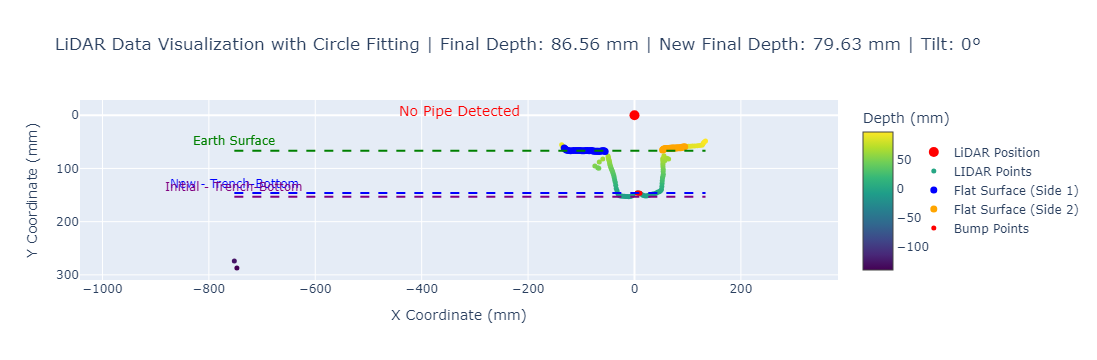

In [3]:
"""
### Summary of the Code:

- **Data Loading and Initialization:**
  - Loads LiDAR data from a JSON file containing angles and distances.
  - Converts angles from degrees to radians.
  - Converts polar coordinates (angle, distance) to Cartesian coordinates (x, y).

- **Coordinate Rotation:**
  - Rotates the coordinates based on a specified tilt angle.
  - Defines specific angle ranges to identify different regions (e.g., the earth's surface, max y-coordinate range).

- **Ground Level Detection:**
  - Identifies the highest y-coordinate within a defined angle range to determine the ground level (`y_surface_level_rotated`).

- **Depth Calculation:**
  - Calculates the depth of each point relative to the identified ground level.

- **Flat Surface Detection:**
  - **Variance Calculation:** 
    - Scans through the data to identify flat surfaces by calculating the variance of y-coordinates over a moving window of points.
    - Points with low variance in y-coordinates are considered part of a flat surface.
  - **Flat Surface Detection Logic:**
    - The function `detect_flat_surface` identifies potential flat regions on both sides of the trench by checking if the variance within a window is below a certain threshold.
    - It stores the indices of the start and end of each detected flat region.

- **Widest Flat Surface Identification:**
  - **Determine the Widest Flat Region:**
    - The function `get_widest_flat_region` calculates the width (in x-coordinates) of each detected flat region.
    - The widest flat region on each side (left and right) is identified.

- **Final Depth Calculation:**
  - **Average Y-Values for Both Sides:**
    - The code calculates the average y-coordinate for the widest flat region on both sides.
    - The side with the higher average y-value is selected.
  - **Final Depth Calculation:**
    - The final depth is determined by subtracting the higher average y-value (from the selected side) from the ground level (`y_surface_level_rotated`).

- **Threshold and Bump Point Detection:**
  - Calculates a threshold as 5% of the final depth and identifies points above this threshold.
  - Attempts to identify and fit a circle to the lowest points around the trench bottom, which could represent a pipe.

- **Plotting:**
  - Generates a plot visualizing the LiDAR points, highlighting the detected flat surfaces and the trench-bottom.
  - Annotates the plot with key information, such as the final depth, the detected trench-bottom, and whether a pipe was detected.

- **Output:**
  - The final plot is saved as an interactive HTML file.

### Key Logical Parts:

1. **Detection of the Widest Flat Surface:**
   - Both sides of the trench are scanned for flat surfaces based on the variance in y-coordinates.
   - The widest flat region on each side is identified by calculating the width in x-coordinates.

2. **Final Depth Calculation:**
   - The average y-values of the widest flat regions from both sides are compared.
   - The higher average y-value is selected and subtracted from the `y_surface_level_rotated` to determine the final depth. 

This approach ensures that the final depth reflects the trench's depth, focusing on the flattest and widest areas detected on both sides of the trench.

"""




import json
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import least_squares

# Function to fit a circle to given points
def fit_circle(x, y):
    def calc_R(xc, yc):
        return np.sqrt((x - xc) ** 2 + (y - yc) ** 2)

    def f_2(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()

    center_estimate = x.mean(), y.mean()
    result = least_squares(f_2, center_estimate)
    xc, yc = result.x
    Ri = calc_R(xc, yc)
    R = Ri.mean()
    return xc, yc, R, Ri

# Given JSON data (shortened for brevity)
json_data = """
{
    "angles": [
                       {"angle": 2, "distance": 146.333328},
        {"angle": 3, "distance": 146.333328},
        {"angle": 4, "distance": 147.000000},
        {"angle": 5, "distance": 149.125000},
        {"angle": 6, "distance": 151.157898},
        {"angle": 7, "distance": 152.333328},
        {"angle": 8, "distance": 153.437500},
        {"angle": 9, "distance": 153.071426},
        {"angle": 10, "distance": 152.899994},
        {"angle": 11, "distance": 152.399994},
        {"angle": 12, "distance": 152.111115},
        {"angle": 13, "distance": 152.142853},
        {"angle": 14, "distance": 152.615387},
        {"angle": 15, "distance": 152.428574},
        {"angle": 16, "distance": 151.545456},
        {"angle": 17, "distance": 151.000000},
        {"angle": 18, "distance": 151.000000},
        {"angle": 19, "distance": 150.300003},
        {"angle": 20, "distance": 148.333328},
        {"angle": 21, "distance": 143.500000},
        {"angle": 22, "distance": 138.333328},
        {"angle": 23, "distance": 133.555557},
        {"angle": 24, "distance": 129.307693},
        {"angle": 25, "distance": 126.375000},
        {"angle": 26, "distance": 123.545456},
        {"angle": 27, "distance": 118.769234},
        {"angle": 28, "distance": 115.000000},
        {"angle": 29, "distance": 110.437500},
        {"angle": 30, "distance": 106.875000},
        {"angle": 31, "distance": 104.199997},
        {"angle": 32, "distance": 100.599998},
        {"angle": 33, "distance": 97.333336},
        {"angle": 34, "distance": 102.500000},
        {"angle": 35, "distance": 96.555557},
        {"angle": 36, "distance": 94.222221},
        {"angle": 37, "distance": 101.125000},
        {"angle": 38, "distance": 104.199997},
        {"angle": 39, "distance": 84.000000},
        {"angle": 40, "distance": 84.166664},
        {"angle": 41, "distance": 84.142860},
        {"angle": 42, "distance": 85.000000},
        {"angle": 43, "distance": 85.666664},
        {"angle": 44, "distance": 87.199997},
        {"angle": 45, "distance": 88.428574},
        {"angle": 46, "distance": 90.000000},
        {"angle": 47, "distance": 91.166664},
        {"angle": 48, "distance": 92.714287},
        {"angle": 49, "distance": 94.111115},
        {"angle": 50, "distance": 95.599998},
        {"angle": 51, "distance": 98.099998},
        {"angle": 52, "distance": 99.833336},
        {"angle": 53, "distance": 101.818184},
        {"angle": 54, "distance": 104.300003},
        {"angle": 55, "distance": 106.250000},
        {"angle": 56, "distance": 107.833336},
        {"angle": 57, "distance": 109.583336},
        {"angle": 58, "distance": 111.285713},
        {"angle": 59, "distance": 114.000000},
        {"angle": 60, "distance": 117.000000},
        {"angle": 61, "distance": 119.833336},
        {"angle": 62, "distance": 123.272728},
        {"angle": 63, "distance": 126.916664},
        {"angle": 64, "distance": 131.272720},
        {"angle": 65, "distance": 134.777771},
        {"angle": 66, "distance": 138.692307},
        {"angle": 67, "distance": 139.375000},
        {"angle": 68, "distance": 139.571426},
        {"angle": 69, "distance": 140.399994},
        {"angle": 70, "distance": 142.111115},
        {"angle": 290, "distance": 800.399994},
        {"angle": 291, "distance": 800.500000},
        {"angle": 292, "distance": 147.666672},
        {"angle": 293, "distance": 147.166672},
        {"angle": 294, "distance": 147.600006},
        {"angle": 295, "distance": 145.666672},
        {"angle": 296, "distance": 144.800003},
        {"angle": 297, "distance": 143.500000},
        {"angle": 298, "distance": 141.333328},
        {"angle": 299, "distance": 137.399994},
        {"angle": 300, "distance": 132.500000},
        {"angle": 301, "distance": 128.399994},
        {"angle": 302, "distance": 125.000000},
        {"angle": 303, "distance": 122.000000},
        {"angle": 304, "distance": 119.000000},
        {"angle": 305, "distance": 116.000000},
        {"angle": 306, "distance": 113.000000},
        {"angle": 307, "distance": 110.000000},
        {"angle": 308, "distance": 108.000000},
        {"angle": 309, "distance": 105.000000},
        {"angle": 310, "distance": 104.000000},
        {"angle": 311, "distance": 102.500000},
        {"angle": 312, "distance": 101.000000},
        {"angle": 313, "distance": 99.000000},
        {"angle": 314, "distance": 97.500000},
        {"angle": 315, "distance": 96.000000},
        {"angle": 316, "distance": 94.500000},
        {"angle": 317, "distance": 92.000000},
        {"angle": 318, "distance": 90.000000},
        {"angle": 319, "distance": 88.500000},
        {"angle": 320, "distance": 87.666664},
        {"angle": 321, "distance": 87.599998},
        {"angle": 322, "distance": 121.000000},
        {"angle": 323, "distance": 110.000000},
        {"angle": 324, "distance": 101.400002},
        {"angle": 325, "distance": 120.250000},
        {"angle": 326, "distance": 120.000000},
        {"angle": 327, "distance": 91.199997},
        {"angle": 328, "distance": 93.000000},
        {"angle": 329, "distance": 94.599998},
        {"angle": 330, "distance": 96.666664},
        {"angle": 331, "distance": 97.800003},
        {"angle": 332, "distance": 100.000000},
        {"angle": 333, "distance": 102.250000},
        {"angle": 334, "distance": 104.428574},
        {"angle": 335, "distance": 106.400002},
        {"angle": 336, "distance": 108.400002},
        {"angle": 337, "distance": 110.285713},
        {"angle": 338, "distance": 112.250000},
        {"angle": 339, "distance": 114.400002},
        {"angle": 340, "distance": 116.875000},
        {"angle": 341, "distance": 119.599998},
        {"angle": 342, "distance": 123.199997},
        {"angle": 343, "distance": 127.400002},
        {"angle": 344, "distance": 131.000000},
        {"angle": 345, "distance": 136.181824},
        {"angle": 346, "distance": 141.857147},
        {"angle": 347, "distance": 145.777771},
        {"angle": 348, "distance": 150.285721},
        {"angle": 349, "distance": 153.000000},
        {"angle": 350, "distance": 154.222229},
        {"angle": 351, "distance": 153.666672},
        {"angle": 352, "distance": 153.857147},
        {"angle": 353, "distance": 153.250000},
        {"angle": 354, "distance": 153.500000},
        {"angle": 355, "distance": 153.199997},
        {"angle": 356, "distance": 153.428574},
        {"angle": 357, "distance": 153.000000},
        {"angle": 358, "distance": 152.000000},
        {"angle": 359, "distance": 150.000000}
    ],
    "tiltAngle": 0.000000,
    "finalDepth": 86.923981,
    "newFinalDepth": 80.001923,
    "detectionStatus": "Pipe Detected",
    "xc": 7.673218,
    "yc": 146.339615,
    "R": 1.791339,
    "max_residual": 1.583982,
    "mean_residual": 1.055988,
    "radius_limit": 3.478334,
    "is_good_fit": 1,
    "diameter_limit": 6.956668,
    "pipeDiameter": 3.582677
}
"""

# Load JSON data
data = json.loads(json_data)

# Extract angles and distances
angles_degrees = [point["angle"] for point in data["angles"]]
distances_mm = [point["distance"] for point in data["angles"]]

# Convert angles from degrees to radians
angles_radians = np.radians(angles_degrees)

# Convert to Cartesian coordinates
x_coords = [distance_mm * np.sin(angle) for angle, distance_mm in zip(angles_radians, distances_mm)]
y_coords = [distance_mm * np.cos(angle) for angle, distance_mm in zip(angles_radians, distances_mm)]

# Assuming the LIDAR is at the origin for simplicity
lidar_pos = (0, 0)

# Define tilt value
tilt = 0  # This can be adjusted as needed

# Rotate the coordinates by tilt angle degrees counterclockwise
rotation_angle = np.radians(tilt)
cos_angle = np.cos(rotation_angle)
sin_angle = np.sin(rotation_angle)
x_coords_rotated = [x * cos_angle - y * sin_angle for x, y in zip(x_coords, y_coords)]
y_coords_rotated = [x * sin_angle + y * cos_angle for x, y in zip(x_coords, y_coords)]

# Define angle ranges with tilt angle adjustment and wrapping logic
startAngleRange1 = (290 + tilt) % 360
endAngleRange1 = (359 + tilt) % 360
startAngleRange2 = (0 + tilt) % 360
endAngleRange2 = (70 + tilt) % 360

if startAngleRange1 < 0: startAngleRange1 += 360
if endAngleRange1 < 0: endAngleRange1 += 360
if startAngleRange2 < 0: startAngleRange2 += 360
if endAngleRange2 < 0: endAngleRange2 += 360

# Define the angle range for selecting the maximum Y-coordinate
max_Y_startAngleRange = (348 + tilt) % 360
max_Y_endAngleRange = (12 + tilt) % 360

if max_Y_startAngleRange < 0: startAngleRange1 += 360
if max_Y_endAngleRange < 0: endAngleRange2 += 360

# Define the angle range for selecting the earth surface
earth_Surface_startAngleRange1  = (290 + tilt) % 360
earth_Surface_endAngleRange1    = (348 + tilt) % 360
earth_Surface_startAngleRange2  = (12 + tilt) % 360
earth_Surface_endAngleRange2    = (70 + tilt) % 360

# Adjust for negative angles, ensuring all angles are positive
if earth_Surface_startAngleRange1  < 0: earth_Surface_startAngleRange1 += 360
if earth_Surface_endAngleRange1    < 0: earth_Surface_endAngleRange1 += 360
if earth_Surface_startAngleRange2  < 0: earth_Surface_startAngleRange2 += 360
if earth_Surface_endAngleRange2    < 0: earth_Surface_endAngleRange2 += 360

# Filter the Y-coordinates within the specified angle range
y_coords_in_range = [
    y for angle, y in zip(angles_degrees, y_coords_rotated) 
    if (max_Y_startAngleRange <= angle <= max_Y_endAngleRange) or 
       (max_Y_startAngleRange > max_Y_endAngleRange and (angle >= max_Y_startAngleRange or angle <= max_Y_endAngleRange))
]

# Ensure there are points within the specified angle range
if not y_coords_in_range:
    raise ValueError("No points found within the specified angle range.")

# Identify the highest Y-coordinate value as the ground level reference after rotation within the angle range
y_surface_level_rotated = max(y_coords_in_range)

# Calculate the depth of each point relative to the highest point (ground level) after rotation
depths_rotated = [y_surface_level_rotated - y for y in y_coords_rotated]

# Define thresholds and minimum points for flat surface detection
y_variance_threshold = 2.5  # Example threshold for y-variance
min_consecutive_points = 15  # Minimum number of consecutive points to consider a flat region


def detect_flat_surface(filtered_x_coords, filtered_y_coords, filtered_angles, y_variance_threshold, min_points):
    flat_regions = []
    i = 0
    while i < len(filtered_x_coords) - min_points:
        # Calculate the variance of y-coordinates in the current window
        y_variance = np.var(filtered_y_coords[i:i + min_points])
        
        # Debugging: Print the variance and associated angle for the window
        print(f"Window start index: {i}, Angle: {filtered_angles[i]:.2f}°, Variance: {y_variance}")

        # If the variance is below the threshold, it's a potential flat region
        if y_variance < y_variance_threshold:
            start = i
            end = i + min_points - 1

            # Try to extend the flat region by adding more points while variance is low
            while end < len(filtered_x_coords) - 1:
                extended_variance = np.var(filtered_y_coords[start:end + 2])
                print(f"Extending region. Start: {start}, Angle: {filtered_angles[start]:.2f}°, End: {end+1}, Angle: {filtered_angles[end+1]:.2f}°, Extended Variance: {extended_variance}")
                
                if extended_variance < y_variance_threshold:
                    end += 1
                else:
                    break

            # If a sufficiently large flat region is found, store it
            if end - start + 1 >= min_points:
                flat_regions.append((start, end))
            i = end
        else:
            i += 1
    return flat_regions


# Function to determine the widest flat region
def get_widest_flat_region(flat_regions, x_coords):
    max_width = 0
    widest_flat_region = None
    for start, end in flat_regions:
        width = abs(x_coords[end] - x_coords[start])
        if width > max_width:
            max_width = width
            widest_flat_region = (start, end)
    return widest_flat_region, max_width

# Print the angles and corresponding indices being considered for Side 1
filtered_angles_side1 = []
filtered_x_coords_side1 = []
filtered_y_coords_side1 = []

for angle, x, y in zip(angles_degrees, x_coords_rotated, y_coords_rotated):
    if (earth_Surface_startAngleRange1 <= angle <= earth_Surface_endAngleRange1) or \
       (earth_Surface_startAngleRange1 > earth_Surface_endAngleRange1 and \
        (angle >= earth_Surface_startAngleRange1 or angle <= earth_Surface_endAngleRange1)):
        filtered_angles_side1.append(angle)
        filtered_x_coords_side1.append(x)
        filtered_y_coords_side1.append(y)

# Print the angles and corresponding indices being considered for Side 2
filtered_angles_side2 = []
filtered_x_coords_side2 = []
filtered_y_coords_side2 = []

for angle, x, y in zip(angles_degrees, x_coords_rotated, y_coords_rotated):
    if (earth_Surface_startAngleRange2 <= angle <= earth_Surface_endAngleRange2) or \
       (earth_Surface_startAngleRange2 > earth_Surface_endAngleRange2 and \
        (angle >= earth_Surface_startAngleRange2 or angle <= earth_Surface_endAngleRange2)):
        filtered_angles_side2.append(angle)
        filtered_x_coords_side2.append(x)
        filtered_y_coords_side2.append(y)

# Detect flat surfaces on both sides
flat_regions_side1 = detect_flat_surface(
    filtered_x_coords_side1,
    filtered_y_coords_side1,
    filtered_angles_side1,  # Add this line to pass the filtered angles
    y_variance_threshold=y_variance_threshold,
    min_points=min_consecutive_points
)

flat_regions_side2 = detect_flat_surface(
    filtered_x_coords_side2,
    filtered_y_coords_side2,
    filtered_angles_side2,  # Add this line to pass the filtered angles
    y_variance_threshold=y_variance_threshold,
    min_points=min_consecutive_points
)


# Determine the widest flat region on each side
widest_flat_region_side1, width_side1 = get_widest_flat_region(flat_regions_side1, filtered_x_coords_side1)
widest_flat_region_side2, width_side2 = get_widest_flat_region(flat_regions_side2, filtered_x_coords_side2)

# Determine the final depth based on the comparison of the average y values of the widest flat surfaces on both sides
if widest_flat_region_side1 is not None and widest_flat_region_side2 is not None:
    # Calculate the average y values for both sides
    avg_flat_y_side1 = np.mean(filtered_y_coords_side1[widest_flat_region_side1[0]:widest_flat_region_side1[1] + 1])
    avg_flat_y_side2 = np.mean(filtered_y_coords_side2[widest_flat_region_side2[0]:widest_flat_region_side2[1] + 1])
    
    # Compare the average y values and select the higher one
    avg_flat_y = max(avg_flat_y_side1, avg_flat_y_side2)
    
    # Calculate the final depth
    final_depth = y_surface_level_rotated - avg_flat_y
    print(f"Selected higher average y value from both sides for final depth calculation. Final Depth: {final_depth:.2f} mm")
elif widest_flat_region_side1 is not None:
    avg_flat_y = np.mean(filtered_y_coords_side1[widest_flat_region_side1[0]:widest_flat_region_side1[1] + 1])
    final_depth = y_surface_level_rotated - avg_flat_y
    print(f"Flat region detected on side 1. Final Depth using flat surface: {final_depth:.2f} mm")
elif widest_flat_region_side2 is not None:
    avg_flat_y = np.mean(filtered_y_coords_side2[widest_flat_region_side2[0]:widest_flat_region_side2[1] + 1])
    final_depth = y_surface_level_rotated - avg_flat_y
    print(f"Flat region detected on side 2. Final Depth using flat surface: {final_depth:.2f} mm")

else:
    print("No flat regions detected. Using depth sorting method.")

    # Collect depths for specified angle ranges
    depths_range1 = [depth for angle, depth in zip(angles_degrees, depths_rotated) 
                     if (earth_Surface_startAngleRange1 <= angle <= earth_Surface_endAngleRange1) or 
                        (earth_Surface_startAngleRange1 > earth_Surface_endAngleRange1 and 
                         (angle >= earth_Surface_startAngleRange1 or angle <= earth_Surface_endAngleRange1))]

    depths_range2 = [depth for angle, depth in zip(angles_degrees, depths_rotated) 
                     if (earth_Surface_startAngleRange2 <= angle <= earth_Surface_endAngleRange2) or 
                        (earth_Surface_startAngleRange2 > earth_Surface_endAngleRange2 and 
                         (angle >= earth_Surface_startAngleRange2 or angle <= earth_Surface_endAngleRange2))]

    # Sort the depths and take the top 30 highest values
    depths_range1.sort(reverse=True)
    depths_range2.sort(reverse=True)

    top_30_depths_range1 = depths_range1[:30]
    top_30_depths_range2 = depths_range2[:30]

    # Take the lowest value out of those 30 values on both sides
    min_top_30_depth_range1 = min(top_30_depths_range1) if top_30_depths_range1 else float('inf')
    min_top_30_depth_range2 = min(top_30_depths_range2) if top_30_depths_range2 else float('inf')

    # Determine the final depth value
    final_depth = min(min_top_30_depth_range1, min_top_30_depth_range2)

    # Print the final depth value
    print(f"Final Depth using depth sorting: {final_depth:.2f} mm")

# Calculate the threshold as 5% of the final depth value
threshold_value = 0.05 * final_depth

# Filter points above the threshold within the specified max Y-coordinate angle range
threshold_indices = [i for i, y in enumerate(y_coords_rotated) 
                     if y >= y_surface_level_rotated - threshold_value and 
                     ((max_Y_startAngleRange <= angles_degrees[i] <= max_Y_endAngleRange) or 
                      (max_Y_startAngleRange > max_Y_endAngleRange and 
                       (angles_degrees[i] >= max_Y_startAngleRange or angles_degrees[i] <= max_Y_endAngleRange)))]

threshold_angles = [angles_degrees[i] for i in threshold_indices]

if threshold_angles:
    # Determine the angle range for the points above the threshold
    threshold_angles.sort()
    if threshold_angles[-1] - threshold_angles[0] <= 180:
        angle_range_start = threshold_angles[0]
        angle_range_end = threshold_angles[-1]
    else:
        for i in range(1, len(threshold_angles)):
            if threshold_angles[i] - threshold_angles[i-1] > 180:
                angle_range_start = threshold_angles[i]
                angle_range_end = threshold_angles[i-1] + 360
                break

    if angle_range_end < angle_range_start:
        angle_range_end += 360

    # Collect all points within this new angle range
    filtered_points = [(x, y, d, a) for x, y, d, a in zip(x_coords_rotated, y_coords_rotated, depths_rotated, angles_degrees)
                       if angle_range_start <= a <= angle_range_end or (angle_range_start <= a + 360 <= angle_range_end) or (angle_range_start <= a - 360 <= angle_range_end)]

    # Ensure the wrap-around angle logic is correct
    adjusted_angles = [a if angle_range_start <= a <= angle_range_end else (a + 360 if a + 360 <= angle_range_end else a - 360) for _, _, _, a in filtered_points]

    # Collect points with adjusted angles
    filtered_points = [(x, y, d, a) for (x, y, d, a), adj_a in zip(filtered_points, adjusted_angles) if angle_range_start <= adj_a <= angle_range_end]

    # Sort the filtered points by their y-coordinate in ascending order
    filtered_points_sorted_by_y = sorted(filtered_points, key=lambda p: p[1])

    # Initialize lowest_point as None
    lowest_point = None

    # Find the lowest y-coordinate point that is also less than the final depth
    for point in filtered_points_sorted_by_y:
        if point[2] < final_depth:
            lowest_point = point
            break

    # Ensure we found a valid point
    if lowest_point is not None:
        lowest_angle_index = angles_degrees.index(lowest_point[3])

        # Adjust depths relative to the new lowest point
        new_depths = [(lowest_point[1] - y) for y in y_coords_rotated]

        # Calculate the new R limit based on your logic
        pipe = y_surface_level_rotated  - lowest_point[1]
        diameter_limit = pipe + 0.005 * pipe  # Adding 0.5% of the pipe depth to account for sinking into the mud
        radius_limit = diameter_limit / 2

        print('Pipe Diameter Limit:', diameter_limit) 

        # Define the maximum allowable Euclidean distance gap to consider points as continuous
        MAX_EUCLIDEAN_DISTANCE_GAP = np.sqrt(2) * radius_limit

        # Ensure proper index wrapping around the list
        bump_indices = [lowest_angle_index]

        # Initialize variables for bump points collection
        left_collected = 0
        right_collected = 0
        i = 1

        # Function to calculate Euclidean distance between two points
        def euclidean_distance(x1, y1, x2, y2):
            return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

        # Collect points to the left and right of the lowest point
        while left_collected < 5 or right_collected < 5:
            if left_collected < 5:
                left_index = (lowest_angle_index - i + len(angles_degrees)) % len(angles_degrees)
                if euclidean_distance(x_coords_rotated[lowest_angle_index], y_coords_rotated[lowest_angle_index],
                                      x_coords_rotated[left_index], y_coords_rotated[left_index]) <= MAX_EUCLIDEAN_DISTANCE_GAP:
                    bump_indices.append(left_index)
                    left_collected += 1
                else:
                    left_collected = 5  # Stop collecting points on this side if a gap is detected
            if right_collected < 5:
                right_index = (lowest_angle_index + i) % len(angles_degrees)
                if euclidean_distance(x_coords_rotated[lowest_angle_index], y_coords_rotated[lowest_angle_index],
                                      x_coords_rotated[right_index], y_coords_rotated[right_index]) <= MAX_EUCLIDEAN_DISTANCE_GAP:
                    bump_indices.append(right_index)
                    right_collected += 1
                else:
                    right_collected = 5  # Stop collecting points on this side if a gap is detected
            i += 1
            if i > len(angles_degrees):  # Safety check to prevent infinite loop in case of too many missing points
                break

        bump_points = [(x_coords_rotated[i], y_coords_rotated[i], depths_rotated[i], new_depths[i], angles_degrees[i]) for i in bump_indices]

        # Fit a circle to these points
        x_bump, y_bump = zip(*[(bp[0], bp[1]) for bp in bump_points])
        xc, yc, R, Ri = fit_circle(np.array(x_bump), np.array(y_bump))

        # Calculate the residuals
        residuals = Ri - R

        # Calculate fit quality metrics
        max_residual = np.max(np.abs(residuals))
        mean_residual = np.mean(np.abs(residuals))

        # Print fit quality metrics for debugging
        print(f"Max Residual: {max_residual}")
        print(f"Mean Residual: {mean_residual}")

        # Check fit quality and radius
        is_good_fit = max_residual < 0.1 * R and mean_residual < 0.05 * R and R <= radius_limit  # Updated radius limit

        if is_good_fit:
            print("The points form a good part of a circle within the specified radius limit.")
        else:
            print("The points do not form a good part of a circle within the specified radius limit.")
    else:
        new_depths = []
        is_good_fit = False
        print("No valid point found for the bump top.")
else:
    filtered_points = []
    new_depths = []
    is_good_fit = False
    print("No points above the threshold value.")

# Calculate the new final depth value
if lowest_point is not None:
    new_final_depth = final_depth - (y_surface_level_rotated - lowest_point[1])
else:
    new_final_depth = final_depth

# Print the new final depth value
print(f"New Final Depth: {new_final_depth:.2f} mm")

# Generate and save the plot
fig = go.Figure()

# Add LiDAR position as a dot
fig.add_trace(go.Scatter(
    x=[0],  # X-coordinate for LiDAR position
    y=[0],  # Y-coordinate for LiDAR position
    mode='markers',
    marker=dict(size=10, color='red', symbol='circle'),
    name='LiDAR Position'
))

# Filter points within the specified angle ranges for plotting
filtered_x_coords_for_plot = []
filtered_y_coords_for_plot = []
filtered_depths_for_plot = []
filtered_new_depths_for_plot = []
filtered_angles_for_plot = []

for angle, x, y, depth, new_depth in zip(angles_degrees, x_coords_rotated, y_coords_rotated, depths_rotated, new_depths):
    if (startAngleRange1 <= angle <= endAngleRange1) or \
       (startAngleRange1 > endAngleRange1 and (angle >= startAngleRange1 or angle <= endAngleRange1)) or \
       (startAngleRange2 <= angle <= endAngleRange2) or \
       (startAngleRange2 > endAngleRange2 and (angle >= startAngleRange2 or angle <= endAngleRange2)):
        filtered_x_coords_for_plot.append(x)
        filtered_y_coords_for_plot.append(y)
        filtered_depths_for_plot.append(depth)
        filtered_new_depths_for_plot.append(new_depth)
        filtered_angles_for_plot.append(angle)

# Updated hover text to include angles, x, y, depths, and new depths
hover_texts = [f'Angle: {angle}°<br>X: {x:.2f}mm<br>Y: {y:.2f}mm<br>Initial Depth: {depth:.2f}mm<br>New Depth: {new_depth:.2f}mm' 
               for angle, x, y, depth, new_depth in zip(filtered_angles_for_plot, filtered_x_coords_for_plot, filtered_y_coords_for_plot, filtered_depths_for_plot, filtered_new_depths_for_plot)]

# Plot all LIDAR points within the angle range
fig.add_trace(go.Scatter(x=filtered_x_coords_for_plot, y=filtered_y_coords_for_plot, mode='markers',
                         marker=dict(size=5, color=filtered_new_depths_for_plot, colorscale='Viridis', colorbar=dict(title='Depth (mm)')),
                         text=hover_texts, hoverinfo='text', name='LIDAR Points'))

# Highlight the flat surface region on Side 1 if detected
if widest_flat_region_side1 is not None:
    flat_x_coords_side1 = filtered_x_coords_side1[widest_flat_region_side1[0]:widest_flat_region_side1[1] + 1]
    flat_y_coords_side1 = filtered_y_coords_side1[widest_flat_region_side1[0]:widest_flat_region_side1[1] + 1]
    flat_hover_texts_side1 = [f'Side 1 Flat Surface<br>Angle: {angle:.2f}°<br>X: {x:.2f}mm<br>Y: {y:.2f}mm' 
                              for angle, x, y in zip(filtered_angles_side1[widest_flat_region_side1[0]:widest_flat_region_side1[1] + 1], flat_x_coords_side1, flat_y_coords_side1)]
    
    fig.add_trace(go.Scatter(x=flat_x_coords_side1, y=flat_y_coords_side1, mode='markers',
                             marker=dict(size=7, color='blue'), text=flat_hover_texts_side1, hoverinfo='text', name='Flat Surface (Side 1)'))

# Highlight the flat surface region on Side 2 if detected
if widest_flat_region_side2 is not None:
    flat_x_coords_side2 = filtered_x_coords_side2[widest_flat_region_side2[0]:widest_flat_region_side2[1] + 1]
    flat_y_coords_side2 = filtered_y_coords_side2[widest_flat_region_side2[0]:widest_flat_region_side2[1] + 1]
    flat_hover_texts_side2 = [f'Side 2 Flat Surface<br>Angle: {angle:.2f}°<br>X: {x:.2f}mm<br>Y: {y:.2f}mm' 
                              for angle, x, y in zip(filtered_angles_side2[widest_flat_region_side2[0]:widest_flat_region_side2[1] + 1], flat_x_coords_side2, flat_y_coords_side2)]
    
    fig.add_trace(go.Scatter(x=flat_x_coords_side2, y=flat_y_coords_side2, mode='markers',
                             marker=dict(size=7, color='orange'), text=flat_hover_texts_side2, hoverinfo='text', name='Flat Surface (Side 2)'))

# Plot the bump points with updated hover text to include angle, depth, and new depth
if lowest_point is not None:
    bump_hover_texts = [f'Angle: {bp[4]}°<br>X: {bp[0]:.2f}mm<br>Y: {bp[1]:.2f}mm<br>Depth: {bp[2]:.2f}mm<br>New Depth: {bp[3]:.2f}mm' 
                        for bp in bump_points]
    bump_points_np = np.array([(bp[0], bp[1]) for bp in bump_points])
    fig.add_trace(go.Scatter(x=bump_points_np[:, 0], y=bump_points_np[:, 1], mode='markers',
                             marker=dict(size=5, color='red'), text=bump_hover_texts, hoverinfo='text', name='Bump Points'))

# Plot the fitted circle if it's a good fit
if lowest_point is not None and is_good_fit:
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = xc + R * np.cos(theta)
    y_circle = yc - R * np.sin(theta)  # Ensure the circle is oriented correctly (downward)
    fig.add_trace(go.Scatter(x=x_circle, y=y_circle, mode='lines', line=dict(color='red'), name='Fitted Circle'))

# Draw the horizontal line from the lowest point
if lowest_point is not None:
    fig.add_shape(type='line',
                  x0=min(filtered_x_coords_for_plot), y0=lowest_point[1],
                  x1=max(filtered_x_coords_for_plot), y1=lowest_point[1],
                  line=dict(color='blue', width=2, dash='dash'),
                  name='Lowest Point Level')

    # Add annotation for the lowest point line
    fig.add_annotation(
        x=min(filtered_x_coords_for_plot), y=lowest_point[1],
        text="New - Trench-Bottom",
        showarrow=False,
        yshift=10,
        font=dict(size=12, color="blue")
    )

# Draw the horizontal line from the final depth value
fig.add_shape(type='line',
              x0=min(filtered_x_coords_for_plot), y0=y_surface_level_rotated - final_depth,
              x1=max(filtered_x_coords_for_plot), y1=y_surface_level_rotated - final_depth,
              line=dict(color='green', width=2, dash='dash'),
              name='Final Depth Level')

# Add annotation for the final depth line
fig.add_annotation(
    x=min(filtered_x_coords_for_plot), y=y_surface_level_rotated - final_depth,
    text="Earth Surface",
    showarrow=False,
    yshift=10,
    font=dict(size=12, color="green")
)

# Draw the horizontal line from the highest y-coordinate value used to calculate the initial depths
fig.add_shape(type='line',
              x0=min(filtered_x_coords_for_plot), y0=y_surface_level_rotated,
              x1=max(filtered_x_coords_for_plot), y1=y_surface_level_rotated,
              line=dict(color='purple', width=2, dash='dash'),
              name='Initial Highest Point Level')

# Add annotation for the highest y-coordinate line
fig.add_annotation(
    x=min(filtered_x_coords_for_plot), y=y_surface_level_rotated,
    text="Initial - Trench-Bottom",
    showarrow=False,
    yshift=10,
    font=dict(size=12, color="purple")
)

# Determine detection status based on residual values
detection_status = "Pipe Detected" if lowest_point is not None and is_good_fit else "No Pipe Detected"

# Add detection status annotation to the plot
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.5, y=1.0,
    showarrow=False,
    text=detection_status,
    font=dict(size=14, color="red" if not is_good_fit else "green")
)

# Adjust the color bar position and the legend position
fig.update_layout(
    title=f'LiDAR Data Visualization with Circle Fitting | Final Depth: {final_depth:.2f} mm | New Final Depth: {new_final_depth:.2f} mm | Tilt: {tilt}°',
    xaxis_title='X Coordinate (mm)',
    yaxis_title='Y Coordinate (mm)',
    legend=dict(
        x=1.1,  # Position the legend more to the right
        y=0.5,  # Position the legend slightly lower
        orientation='v',
    ),
    yaxis=dict(autorange='reversed'),
    xaxis=dict(scaleanchor='y', scaleratio=1),  # Maintain aspect ratio to ensure the circle is not distorted
    coloraxis_colorbar=dict(
        x=1.2,  # Move the color bar slightly to the right
        y=0.5,   # Center the color bar vertically
        len=0.7, # Adjust the length of the color bar
    )
)

fig.show()

# Save plot as an interactive HTML file
fig.write_html("PRFILE_AKSELI.html")
